In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
df = pd.read_csv('netflix_data.csv', index_col=0)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Check maximum length of columns

In [3]:
check_cols = ['title', 'director', 'country', 'description', 'listed_in']
for col in check_cols:
    max_len = df[col].dropna().map(lambda x: len(x)).max()
    print(f'The max length of the {col} column is: {max_len}')

The max length of the title column is: 104
The max length of the director column is: 208
The max length of the country column is: 123
The max length of the description column is: 248
The max length of the listed_in column is: 79


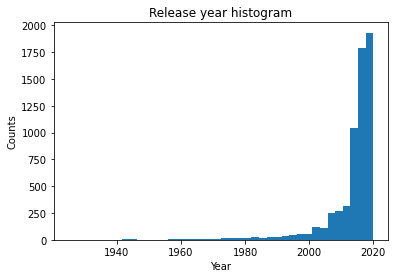

In [4]:
years  = df['release_year'].values
plt.hist(years, density=False, bins=40)
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Release year histogram')
plt.show()

In [5]:
categories = set([i[0] for i in df['listed_in'].str.split(',').values])
categories

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'Thrillers'}

In [6]:
directors = set([i[0] for i in df['director'].dropna().str.split(',').values])
directors

{'Syed Atif Ali',
 'Khaled El Halafawy',
 'Nuel Naval',
 'Oz Rodriguez',
 'Alberto Rodríguez',
 'Momoko Kamiya',
 'Bryan Singer',
 'Shaina Allen',
 'Anne Fontaine',
 'Ron Underwood',
 'Anita Barbosa',
 'Tanuja Chandra',
 'Alexandre Aja',
 'April Mullen',
 'Damien O’Connor',
 'Byron Howard',
 'Dani Levy',
 'Farhan Akhtar',
 'Florian Henckel von Donnersmarck',
 'Ibrahim Bin Mohamed',
 'Andy Goddard',
 'Alexandre Heboyan',
 'Danny Leiner',
 'Federico Lemos',
 'Owen Egerton',
 'David Blair',
 'Ryan Murphy',
 'Scott Zabielski',
 'Drew Stone',
 'Kyle Rideout',
 'Roger Young',
 'Evan Katz',
 'Shanawaz Nellikunnil',
 'Fabrice Du Welz',
 'Sidharth Malhotra',
 'Farhan Alam',
 "Alma Har'el",
 'Mark Williams',
 'Pierre Coré',
 'Vivieno Caldinelli',
 'Carlos Bolado',
 'Sarjun',
 'Marina Seresesky',
 'Malik Bendjelloul',
 'Zoe Lister-Jones',
 'Alex Proyas',
 'Xavier Durringer',
 'Prashant Nair',
 'Praveen Nischol',
 'Rene Bueno',
 'Stephen Cone',
 'Constance Marks',
 'Kitty Green',
 'R. Ellis Frazie

In [7]:
countries = set([i[0] for i in df['country'].dropna().str.split(',').values])
countries

{'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Egypt',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Malaysia',
 'Mauritius',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovenia',
 'Somalia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Turkey',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Venezuela',
 'Vietnam',
 'West Germany'}

### Check image sizes

In [8]:
image_dir = 'media/images/'
size_list = []
for i, fname in enumerate(os.listdir(image_dir)):
    img = Image.open(image_dir + fname)
    width, height = img.size
    print(fname)
    print(f'Image: {i}, Width: {width}, Height: {height}')
    size_list.append((width, height))

default_image.png
Image: 0, Width: 480, Height: 480
80117401.jpg
Image: 1, Width: 500, Height: 750
80057700.jpg
Image: 2, Width: 500, Height: 750
70304990.jpg
Image: 3, Width: 500, Height: 750
70234439.jpg
Image: 4, Width: 500, Height: 735
80125979.jpg
Image: 5, Width: 500, Height: 750
80060297.jpg
Image: 6, Width: 500, Height: 751
70304988.jpg
Image: 7, Width: 500, Height: 750
80164077.jpg
Image: 8, Width: 500, Height: 750
70299204.jpg
Image: 9, Width: 500, Height: 750
80163890.jpg
Image: 10, Width: 500, Height: 750
80045922.jpg
Image: 11, Width: 500, Height: 750
80057969.jpg
Image: 12, Width: 500, Height: 750
80058654.jpg
Image: 13, Width: 500, Height: 735
80169755.jpg
Image: 14, Width: 500, Height: 751
80046728.jpg
Image: 15, Width: 500, Height: 750
70304989.jpg
Image: 16, Width: 500, Height: 750
81145628.jpg
Image: 17, Width: 500, Height: 750
80117902.jpg
Image: 18, Width: 500, Height: 750


In [12]:
df['country'].value_counts()

United States                           2032
India                                    777
United Kingdom                           348
Japan                                    176
Canada                                   141
                                        ... 
Sweden, United Kingdom, Finland            1
China, United States, United Kingdom       1
Turkey, United States                      1
Canada, Luxembourg                         1
Indonesia, United States                   1
Name: country, Length: 554, dtype: int64

In [20]:
df['listed_in'].dropna().values

array(['Children & Family Movies, Comedies', 'Stand-Up Comedy',
       "Kids' TV", ..., 'Movies',
       'British TV Shows, TV Comedies, TV Dramas',
       'Classic & Cult TV, TV Comedies'], dtype=object)